# Machine Learning Project

When complete, email me the jupyter notebook OR a python script as follows:
YourLastName_MachineLearingProjV3

Assignment: Perform the following analyses on gum_disease_data.txt 
The features will be the bacterial species abundances and the classifier will be status. 

(1) Run a Decision Tree classifier.
(2) Run a Support Vector Machine analysis.
(3) Extra credit (1 point): Tensor flow neural network.

Helpful sites for Decision Tree code:
http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/
Plotting the decision trees:
https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn

(Some Random Forest code in case you are interested: https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn)

For Support Vector Machine help see the HA3-checkpoint jupyter notebook or python script.

For Tensor Flow support (using Iris dataset):
https://www.kaggle.com/richbrosius/iris-classification-using-tensorflow

Better datasets for tensor flow:
https://www.tensorflow.org/tutorials/keras/basic_classification
https://adventuresinmachinelearning.com/python-tensorflow-tutorial/

## Data manipulation and plotting libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score

## Decision Tree libraries

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

## SVM Libraries

In [22]:
from sklearn import svm
from sklearn.svm import LinearSVC

## Read in data set

In [23]:

df=pd.read_csv('gum_disease_data.txt', sep='\t', index_col=False, low_memory=False)
df.head()

,id,strep,prev,lepto,fuso,veil,time,status,pocket,deepest
0,S001,57.4,10.2,0.1,0.0,6.9,1,0,2.7,3.8
1,S001,26.0,0.0,25.6,0.0,6.3,2,0,2.7,3.0
2,S006,19.0,24.2,4.8,5.7,4.2,1,0,2.5,3.2
3,S006,15.2,4.2,0.2,2.6,3.4,2,0,2.4,3.2
4,S007,33.2,2.3,7.4,1.3,12.0,1,0,2.4,2.7


In [24]:
df.shape

(72, 10)

There are 72 observation and 10 features

## Training set for all analyses

Splitting data into train and test set with 70% train data and rest as test

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,~df.columns.isin(['status','id'])], df['status'],
                                                   test_size = 0.33, random_state = 100)

Plotting the correlation matrix to check if any features are highlt correlated

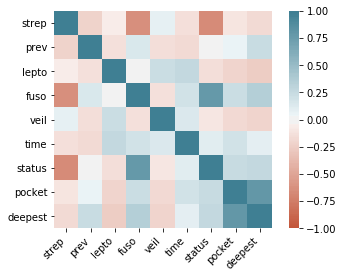

In [26]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Part 1

## Decision Tree Analysis

Decision Tree with Gini IndexPython

In [27]:
clf_gini = DecisionTreeClassifier(criterion = "gini")
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Generate Decision Tree

[Text(167.4, 163.07999999999998, 'X[3] <= 9.9\ngini = 0.457\nsamples = 48\nvalue = [31, 17]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]')]

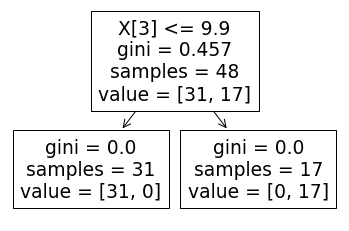

In [28]:
tree.plot_tree(clf_gini)

## Show gini prediction

In [29]:
y_pred = clf_gini.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1])

## Print accuracy

In [30]:
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  100.0


Decision Tree has accurately classified all the test data

In [31]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


## Create dot file of Decision Tree

In [32]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns           
                              )

graph = graphviz.Source(dot_data) 

graph 

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

## Part 2

## Support Vector Machine

## Visualize the first 5 rows of the dataset

In [33]:
df.head()

,id,strep,prev,lepto,fuso,veil,time,status,pocket,deepest
0,S001,57.4,10.2,0.1,0.0,6.9,1,0,2.7,3.8
1,S001,26.0,0.0,25.6,0.0,6.3,2,0,2.7,3.0
2,S006,19.0,24.2,4.8,5.7,4.2,1,0,2.5,3.2
3,S006,15.2,4.2,0.2,2.6,3.4,2,0,2.4,3.2
4,S007,33.2,2.3,7.4,1.3,12.0,1,0,2.4,2.7


## View pairwise plots of all bacteria features (strep, prev, lepto, fuso, veil) to find best combination of dimensions (clearest separation between class 0 and 1)

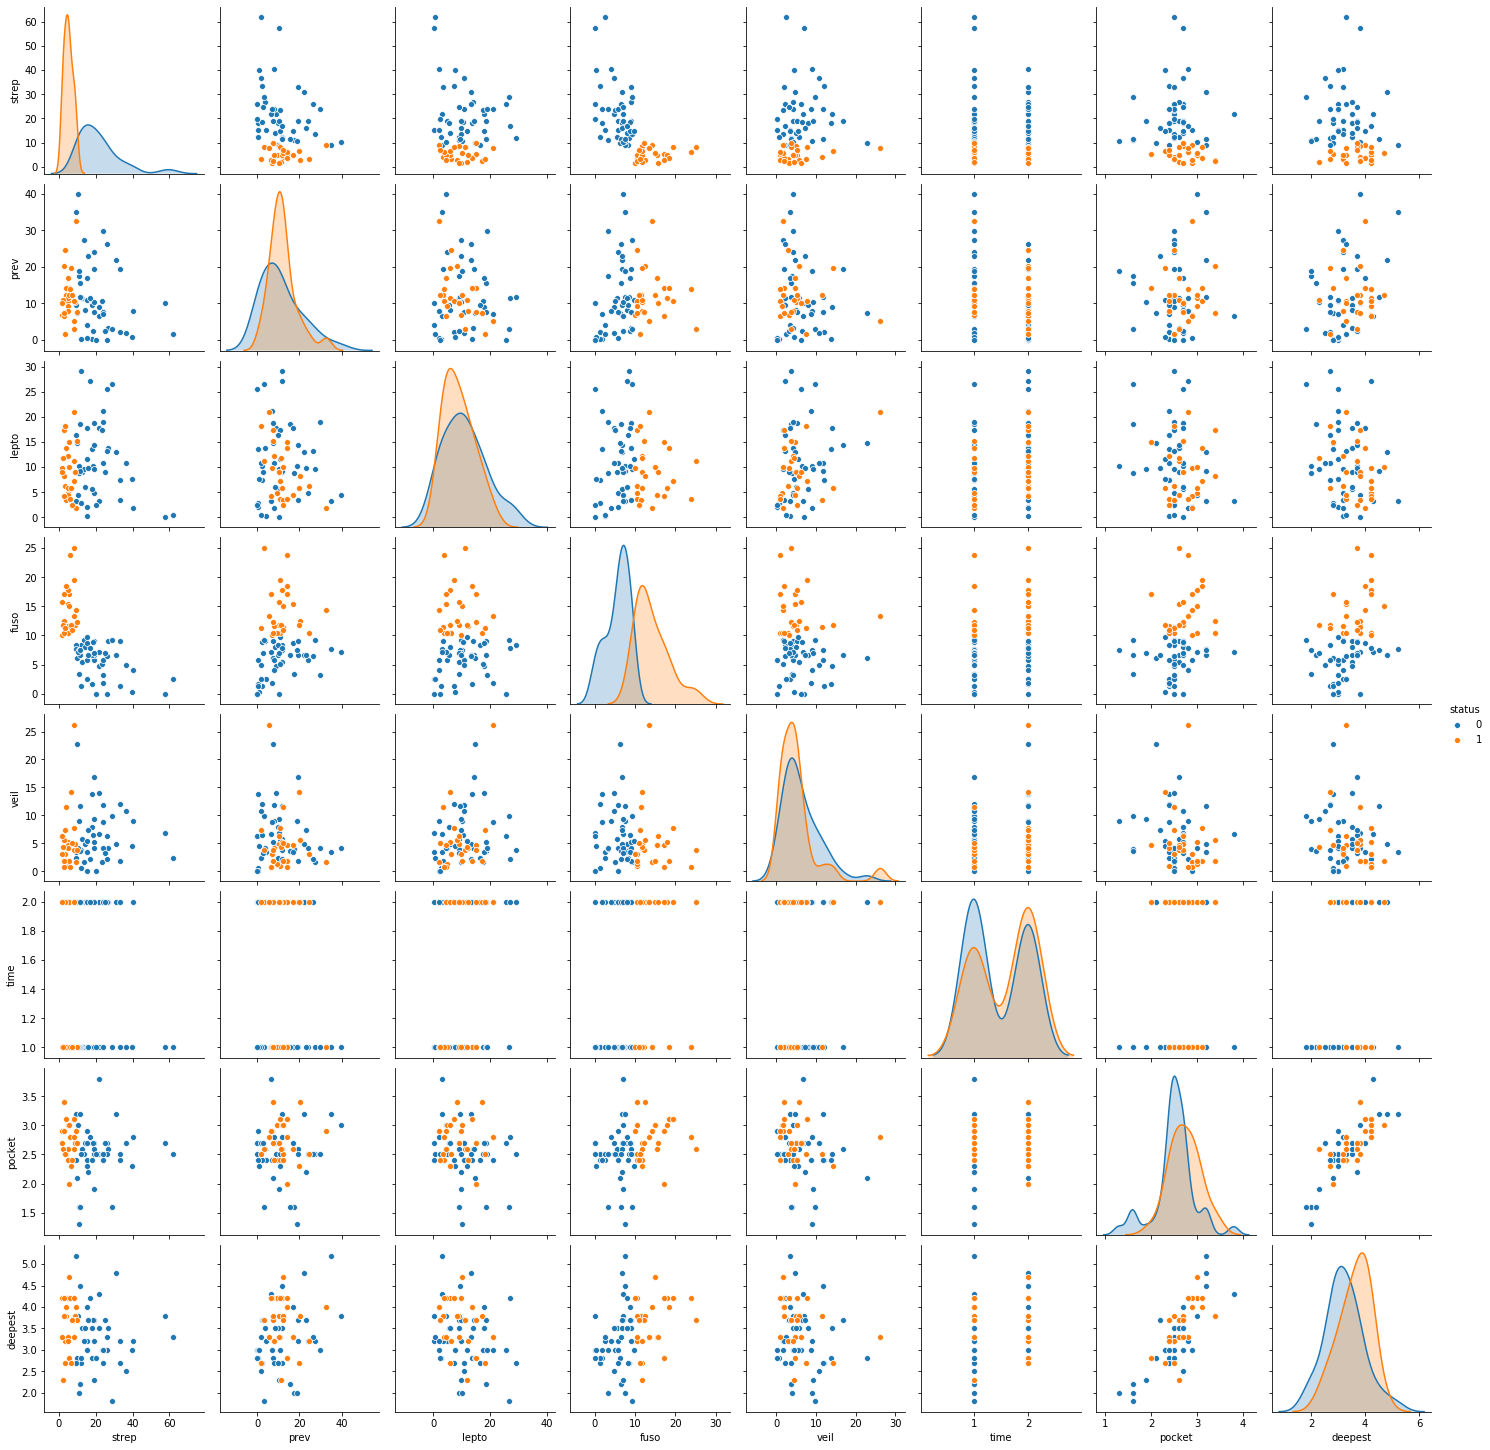

In [34]:
import seaborn as sns
sns.pairplot(df, vars =X_train.columns, hue = 'status')

Fuso and strep can be linearly seperable
also fuso and prev
fuso and lepto
fuso and veil

## Make the training and testing arrays

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,~df.columns.isin(['status','id'])], df['status'],
                                                   test_size = 0.33, random_state = 100)

# Part A) Non-linear SVM Classifier

## Train the SVM model

In [36]:
from sklearn import svm

In [37]:
training_array = []
train_pl_array = np.asarray(X_train['fuso'])
train_pw_array = np.asarray(X_train['strep'])
for i in range(0, len(train_pl_array)):
    pair = []
    pair.extend([train_pl_array[int(i)], train_pw_array[int(i)]])
    training_array.append(pair)
training_array = np.array(training_array)

In [38]:
testing_array = []
test_pl_array = np.asarray(X_test['fuso'])
test_pw_array = np.asarray(X_test['strep'])
for i in range(0, len(test_pl_array)):
    pair = []
    pair.extend([test_pl_array[int(i)], test_pw_array[int(i)]])
    testing_array.append(pair)
testing_array = np.array(testing_array)

In [39]:

svc_clf = svm.SVC(gamma= 'auto')
svc_clf.fit(training_array, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## SVM model predictions on the test data

In [40]:
prediction = svc_clf.predict(testing_array)
prediction

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1])

## Make the confusion matrix. Categories "Healthy" (status 0) and "Not Healthy" (status 1)

In [41]:
from sklearn.metrics import confusion_matrix
confuse = pd.DataFrame(confusion_matrix(y_test, prediction),
                       columns= ['Predicted Healthy', 'Predicted Not Healthy'],
                       index = ['True Healthy', 'True Not Healthy'])
confuse

,Predicted Healthy,Predicted Not Healthy
True Healthy,15,0
True Not Healthy,3,6


## Show Decision Boundary Plot

Text(0.5, 1.0, 'SVM Decision Boundary Region')

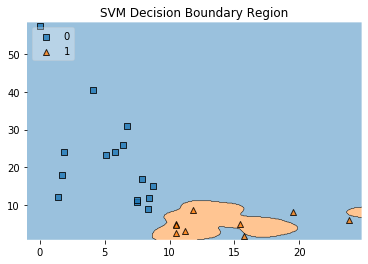

In [42]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X= testing_array, 
                      y=np.array(y_test),
                      clf=svc_clf, 
                      legend=2)
plt.title('SVM Decision Boundary Region')

# Part B) Linear SVM Classifier

## Train the linear classifier

In [43]:
from sklearn.svm import LinearSVC

In [44]:
lsvc_clf = LinearSVC(random_state= 0, tol = 1e-5)
lsvc_clf.fit(training_array, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

In [45]:
prediction_2 = lsvc_clf.predict(testing_array)
prediction_2

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1])

## Make the confusion matrix. Categories "Healthy" (status 0) and "Not Healthy" (status 1)

In [46]:
pd.DataFrame(confusion_matrix(prediction_2, y_test),
             columns = ['Predicted Healthy', 'Predicted non Healthy'],
             index = ['True Healthy', 'True Not Healthy'])

,Predicted Healthy,Predicted non Healthy
True Healthy,15,0
True Not Healthy,0,9


## Show Precision and Recall scores

In [47]:
precision_score(prediction_2, y_test)

1.0

In [48]:
recall_score(prediction_2, y_test)

1.0

## Show Decision Boundary Plot

Text(0.5, 1.0, 'SVM Decision Boundary Region')

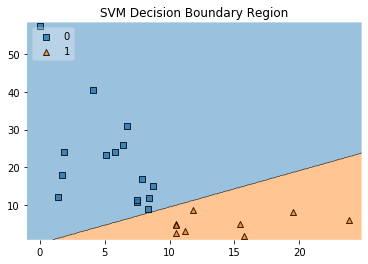

In [49]:
plot_decision_regions(X= testing_array, 
                      y=np.array(y_test),
                      clf=lsvc_clf, 
                      legend=2)
plt.title('SVM Decision Boundary Region')

# Part C) Neural Network extra credit

In [50]:
from tensorflow import keras
from numpy.random import seed

Now we build a simple neural network composed of single stack of layers, connected Sequentially. Known as a Sequential Model.
The first layer is a flatten layer whose only role is to convert the input to a 1D array. Therefore the input shape is defined as per the X_train input frame.
Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation function.
Next we add a second Dense hidden layer with 100 neurons, also using the ReLU activation function.
Finally, we add a Dense output layer with 1 neuron, using the sigmoid activation function, since we only want to do a binary classification. If this was a multiclass problem we would have added neurons corresponding to the number of classes and a relevant activation function (e.g softmax)

In [51]:

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=X_train.shape[1:])) 
model.add(keras.layers.Dense(300, activation="relu")) 
model.add(keras.layers.Dense(100, activation="relu")) 
model.add(keras.layers.Dense(1, activation="sigmoid"))


We now compile the model. Since this is a binary classification model, we use "binary_crossentropy" as the loss function and use "accuracy" as our metrics. Optimizer used here is "sgd" (gradient descent).

In [52]:
model.compile(loss="binary_crossentropy", optimizer="sgd",metrics=["accuracy"])

Now the model is ready to be trained. We call the fit function. Set it to 30 epochs (i.e. 30 iterations). And we also pass a validation set to test our model against validation data set.

In [53]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Train on 48 samples, validate on 24 samples
Epoch 1/30
48/48 [==============================] - 0s 10ms/sample - loss: 1.7097 - accuracy: 0.4375 - val_loss: 0.4923 - val_accuracy: 0.8333
Epoch 2/30
48/48 [==============================] - 0s 363us/sample - loss: 0.4188 - accuracy: 0.8542 - val_loss: 0.3827 - val_accuracy: 0.9167
Epoch 3/30
48/48 [==============================] - 0s 360us/sample - loss: 0.3112 - accuracy: 0.9583 - val_loss: 0.3226 - val_accuracy: 0.8750
Epoch 4/30
48/48 [==============================] - 0s 375us/sample - loss: 0.2697 - accuracy: 0.8750 - val_loss: 0.3200 - val_accuracy: 0.8750
Epoch 5/30
48/48 [==============================] - 0s 406us/sample - loss: 0.2174 - accuracy: 0.9792 - val_loss: 0.2332 - val_accuracy: 1.0000
Epoch 6/30
48/48 [==============================] - 0s 366us/sample - loss: 0.1900 - accuracy: 0.9792 - val_loss: 0.2296 - val_accuracy: 0.9167
Epoch 7/30
48/48 [==============================] - 0s 390us/sample - loss: 0.1718 - accuracy

We see that the training loss has gone down and training accuracy is a 100%. Performance on validation data set however returns an accuracy of 91%
Now lets test the performance of our model on the test data set.

In [54]:
model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 106us/sample - loss: 0.0958 - accuracy: 0.9583


[0.09584974497556686, 0.9583333]

The model performs exceptionally well on the test data set and returns an accuracy of 95%

In [55]:
y_pred = model.predict(X_test)

In [56]:
y_pred.round(0)

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [57]:
pd.DataFrame(confusion_matrix(y_pred.round(0), y_test),
             columns = ['Predicted Healthy', 'Predicted non Healthy'],
             index = ['True Healthy', 'True Not Healthy'])

,Predicted Healthy,Predicted non Healthy
True Healthy,14,0
True Not Healthy,1,9


In [58]:
precision_score(y_pred.round(0), y_test)

1.0